<a href="https://colab.research.google.com/github/Adnan3792/DataScience/blob/main/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digit Prediction - Classification Analysis**

**The digits dataset consists of 8×8 pixel images of digits. The images attribute of the dataset stores 8×8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents.**

**Import Library**

In [148]:
import pandas as pd


In [149]:
import numpy as np

In [150]:
import matplotlib.pyplot as plt


**Import Data**

In [151]:
from sklearn.datasets import load_digits

In [152]:
df=load_digits()

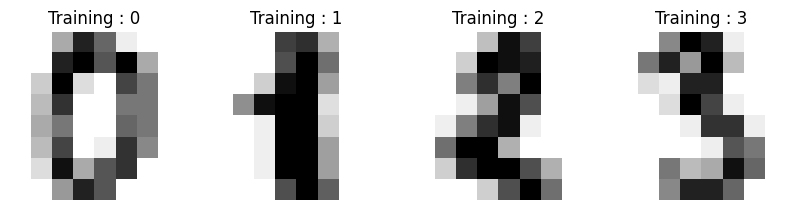

In [153]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image , label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training : %i" % label )

**Data Preprocessing**

In [154]:
df.images.shape

(1797, 8, 8)

In [155]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [156]:
df.images[0].shape

(8, 8)

In [157]:
len(df.images)

1797

In [158]:
n_samples =len(df.images)
data = df.images.reshape((n_samples,-1))

In [159]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [160]:
data[0].shape

(64,)

In [161]:
data.shape

(1797, 64)

**Scaling Image Data**

In [162]:
data.min()

0.0

In [163]:
data.max()

16.0

In [164]:
data=data/16

In [165]:
data.min()

0.0

In [166]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split Data**

In [167]:
from sklearn.model_selection import  train_test_split

In [168]:
x_train,x_test,y_train,y_test=train_test_split(data,df.target,test_size=0.3)

In [169]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Method**

In [170]:
from  sklearn.ensemble import  RandomForestClassifier

In [171]:
rf=RandomForestClassifier()

In [172]:
rf.fit(x_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [173]:
y_pred=rf.predict(x_test)

In [174]:
y_pred

array([7, 1, 5, 1, 9, 9, 8, 6, 4, 8, 5, 0, 7, 9, 1, 5, 4, 6, 1, 3, 6, 1,
       5, 2, 8, 0, 9, 4, 6, 0, 6, 0, 2, 9, 5, 4, 8, 3, 5, 6, 5, 1, 5, 1,
       3, 6, 2, 3, 0, 6, 2, 9, 9, 0, 2, 8, 8, 2, 5, 9, 2, 6, 6, 3, 7, 0,
       1, 0, 3, 2, 8, 6, 4, 5, 7, 8, 2, 4, 6, 8, 2, 7, 1, 1, 4, 0, 7, 5,
       5, 9, 2, 3, 3, 1, 3, 7, 5, 4, 7, 1, 6, 3, 9, 4, 7, 0, 9, 4, 1, 5,
       8, 0, 4, 8, 0, 8, 7, 9, 0, 1, 1, 7, 6, 6, 6, 2, 2, 1, 1, 9, 6, 2,
       9, 6, 5, 5, 1, 3, 5, 8, 5, 8, 1, 6, 8, 0, 7, 1, 0, 3, 7, 3, 1, 8,
       6, 9, 5, 5, 1, 1, 4, 7, 5, 1, 6, 7, 0, 9, 3, 7, 9, 6, 8, 1, 1, 3,
       9, 8, 7, 2, 8, 2, 8, 4, 7, 6, 8, 8, 3, 8, 5, 9, 2, 2, 5, 7, 0, 7,
       2, 9, 2, 7, 5, 9, 2, 4, 0, 6, 7, 4, 6, 4, 3, 3, 5, 5, 2, 5, 5, 4,
       3, 0, 9, 0, 7, 8, 8, 5, 4, 5, 0, 7, 8, 4, 6, 0, 6, 9, 8, 1, 0, 2,
       9, 5, 6, 0, 1, 8, 0, 1, 5, 5, 5, 2, 8, 9, 2, 5, 2, 5, 8, 0, 4, 4,
       4, 3, 8, 9, 2, 7, 1, 9, 8, 0, 6, 1, 1, 9, 6, 3, 9, 4, 4, 3, 8, 7,
       9, 4, 8, 3, 3, 3, 4, 7, 6, 2, 0, 0, 1, 3, 5,

**Model Accuracy**

In [175]:
from sklearn.metrics import confusion_matrix,classification_report


In [176]:
confusion_matrix(y_test,y_pred)

array([[50,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 60,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 49,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 44,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 68,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 51,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 1,  3,  0,  1,  0,  0,  0,  1, 52,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 57]])

In [177]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.95      1.00      0.98        60
           2       1.00      1.00      1.00        49
           3       0.98      0.98      0.98        45
           4       0.98      0.98      0.98        45
           5       0.97      1.00      0.99        68
           6       1.00      0.96      0.98        53
           7       0.95      1.00      0.97        53
           8       0.98      0.90      0.94        58
           9       1.00      0.98      0.99        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

